출처 : https://compas.lh.or.kr/subj/past/data?subjNo=SBJ_2007_001
        
## 고양시 공공자전거 스테이션 최적지 선정 데이터셋

- 2017~ 19년 고양시 공공자전거 운영 이력 정보를 가지고, 최대 300대 개소를 어디에 위치할 지 조정 필요
- 한 스테이션에는 30개의 자전거 수용 가능

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
usage = pd.read_csv('./SBJ_2007_001/01.운영이력.csv')

/Users/jinseulpark/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


- LEAS_NO    대여 번호
- LEAS_DATE    대여 시간
- LEAS_STATION    대여 스테이션 번호
- LEAS_DEF_NO    대여 거치대 번호
- RTN_DATE    반납 시간
- RTN_STATION    반납 스테이션 번호
- RTN_DEF_NO    반납 거치대 번호
- RTN_PROCESS    관제반납구분값 (01:관제반납/02:관리자반납/03:관리자반출/04:타 사용자 반납/05:다른 사용자 반출)
- TRNV_QTY    추정 이동 거리(m)
- MEMB_DIV    회원 구분(비회원은 99이며 나머지는 정회원)
- MEMB_NO    회원 번호
- TEMP_MEMB_NO    비회원 번호
- BIKE_TAG    자전거 번호

In [3]:
usage.columns = usage.columns.str.lower()
# leas_no 

In [4]:
col_kr={'LEAS_NO':'대여 번호'
,'LEAS_DATE':'대여 시간'
,'LEAS_STATION':'대여 스테이션 번호'
,'LEAS_DEF_NO':'대여 거치대 번호'
,'RTN_DATE':'반납 시간'
,'RTN_STATION':'반납 스테이션 번호'
,'RTN_DEF_NO':'반납 거치대 번호'
,'RTN_PROCESS':'관제반납구분값 (01:관제반납/02:관리자반납/03:관리자반출/04:타 사용자 반납/05:다른 사용자 반출)'
,'TRNV_QTY':'추정 이동 거리(m)'
,'MEMB_DIV':'회원 구분(비회원은 99이며 나머지는 정회원)'
,'MEMB_NO':'회원 번호'
,'TEMP_MEMB_NO':'비회원 번호'
,'BIKE_TAG':'자전거 번호'}


In [5]:
usage.shape

(3142688, 14)

In [6]:
usage.describe()

,leas_no,leas_stat,leas_station,leas_def_no,rtn_station,rtn_def_no,trnv_qty,memb_no,temp_memb_no,rtn_process
count,3.142688e+06,3142688.0,3.142688e+06,3.142688e+06,3.142688e+06,3.142688e+06,2.747029e+06,3.142688e+06,3.142685e+06,410039.000000
mean,1.882270e+07,2.0,2.487533e+02,1.335679e+01,2.175205e+02,1.119356e+01,4.895855e+03,1.315026e+05,9.174356e+05,1.121984
std,1.674327e+06,0.0,6.367190e+01,7.404129e+00,1.017983e+02,8.703353e+00,1.264047e+04,9.720860e+04,1.587276e+06,0.590959
min,1.594554e+07,2.0,1.010000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000
25%,1.735176e+07,2.0,2.130000e+02,8.000000e+00,2.030000e+02,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000
50%,1.883170e+07,2.0,2.460000e+02,1.300000e+01,2.320000e+02,1.100000e+01,0.000000e+00,1.849010e+05,0.000000e+00,1.000000
75%,2.029006e+07,2.0,3.090000e+02,1.800000e+01,3.070000e+02,1.700000e+01,0.000000e+00,2.065770e+05,3.191189e+06,1.000000
max,2.171861e+07,2.0,9.980000e+02,4.000000e+01,9.990000e+02,9.900000e+01,6.553500e+04,4.099376e+06,4.124667e+06,5.000000


대여 번호
대여 시간
대여 스테이션 번호
대여 거치대 번호
반납 시간
반납 스테이션 번호
반납 거치대 번호
추정 이동 거리(m)
회원 구분(비회원은 99이며 나머지는 정회원)
회원 번호
비회원 번호
자전거 번호
관제반납구분값 (01:관제반납/02:관리자반납/03:관리자반출/04:타 사용자 반납/05:다른 사용자 반출)
1.0    391188
3.0     12693
5.0      6158
Name: rtn_process, dtype: int64


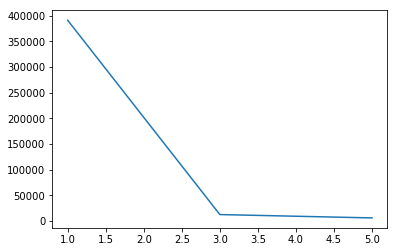

In [7]:
for i in usage.columns.to_list():
    try:
        print(col_kr[i.upper()])
        nunique_cnt =usage[i].nunique()
        if nunique_cnt < 10:
            print(usage[i].value_counts())
            plt.plot(usage[i].value_counts())
    except:
        continue

In [8]:
usage.head()

,leas_no,leas_stat,leas_date,leas_station,leas_def_no,rtn_date,rtn_station,rtn_def_no,trnv_qty,memb_div,memb_no,temp_memb_no,bike_tag,rtn_process
0,15945541,2,2017-01-01 00:00:41,213,18,2017-01-01 00:13:52,260,17,0.0,6,164203,0.0,1A844000000BB7,NaN
1,15945542,2,2017-01-01 00:01:03,231,4,2017-01-01 00:50:24,231,17,31039.0,1,187551,0.0,1A844000000494,NaN
2,15945543,2,2017-01-01 00:01:50,119,14,2017-01-01 01:01:50,0,0,NaN,12,168994,0.0,1A844000000533,1.0
3,15945544,2,2017-01-01 00:02:09,121,17,2017-01-01 00:15:58,133,14,15490.0,12,183971,0.0,1A844000000731,NaN
4,15945545,2,2017-01-01 00:03:32,320,29,2017-01-01 00:18:44,259,27,0.0,12,167475,0.0,1A84400000F343,NaN


In [9]:
usage.dtypes

leas_no           int64
leas_stat         int64
leas_date        object
leas_station      int64
leas_def_no       int64
rtn_date         object
rtn_station       int64
rtn_def_no        int64
trnv_qty        float64
memb_div         object
memb_no           int64
temp_memb_no    float64
bike_tag         object
rtn_process     float64
dtype: object

In [10]:
usage['leas_date_dt'] = pd.to_datetime(usage['leas_date'], format = '%Y-%m-%d %H:%M:%S')
usage['rtn_date_dt'] = pd.to_datetime(usage['rtn_date'], format = '%Y-%m-%d %H:%M:%S')

In [11]:
usage['rtn_leas_timegap'] = usage['rtn_date_dt'] - usage['leas_date_dt']

In [12]:
usage['timegap_sec'] = usage['rtn_leas_timegap'].dt.total_seconds()

In [13]:
usage.groupby(['timegap_sec'])['memb_no','temp_memb_no'].count()

,memb_no,temp_memb_no
timegap_sec,,
0.0,6636,6636
1.0,2162,2162
2.0,2960,2960
3.0,6093,6093
4.0,4586,4586
5.0,3591,3591
6.0,3360,3360
7.0,2798,2798
8.0,3340,3340


In [14]:
usage.timegap_sec.mean()

1576.582432618192

In [15]:
usage.describe()

,leas_no,leas_stat,leas_station,leas_def_no,rtn_station,rtn_def_no,trnv_qty,memb_no,temp_memb_no,rtn_process,rtn_leas_timegap,timegap_sec
count,3.142688e+06,3142688.0,3.142688e+06,3.142688e+06,3.142688e+06,3.142688e+06,2.747029e+06,3.142688e+06,3.142685e+06,410039.000000,3142688,3.142688e+06
mean,1.882270e+07,2.0,2.487533e+02,1.335679e+01,2.175205e+02,1.119356e+01,4.895855e+03,1.315026e+05,9.174356e+05,1.121984,0 days 00:26:16.582432,1.576582e+03
std,1.674327e+06,0.0,6.367190e+01,7.404129e+00,1.017983e+02,8.703353e+00,1.264047e+04,9.720860e+04,1.587276e+06,0.590959,0 days 05:04:32.115662,1.827212e+04
min,1.594554e+07,2.0,1.010000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0 days 00:00:00,0.000000e+00
25%,1.735176e+07,2.0,2.130000e+02,8.000000e+00,2.030000e+02,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0 days 00:07:05,4.250000e+02
50%,1.883170e+07,2.0,2.460000e+02,1.300000e+01,2.320000e+02,1.100000e+01,0.000000e+00,1.849010e+05,0.000000e+00,1.000000,0 days 00:14:12,8.520000e+02
75%,2.029006e+07,2.0,3.090000e+02,1.800000e+01,3.070000e+02,1.700000e+01,0.000000e+00,2.065770e+05,3.191189e+06,1.000000,0 days 00:35:08,2.108000e+03
max,2.171861e+07,2.0,9.980000e+02,4.000000e+01,9.990000e+02,9.900000e+01,6.553500e+04,4.099376e+06,4.124667e+06,5.000000,366 days 00:59:28,3.162597e+07


In [16]:
u_toy=usage[['leas_station','rtn_station','timegap_sec']]

In [17]:
# 한번 타고 다시 원래 공간으로 돌아온 사람 : true, 다른 곳으로 이동한 사람 false
u_toy.loc[ u_toy.leas_station == u_toy.rtn_station,'same_station'] = True
u_toy.loc[ u_toy.leas_station != u_toy.rtn_station,'same_station'] = False

/Users/jinseulpark/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/jinseulpark/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [18]:
total = u_toy.groupby('same_station')['timegap_sec'].count().sum()
u_toy.groupby('same_station')['timegap_sec'].count()/total
# 유저의 87% 가 이동하여 다른 위치에 반납
# 유저의 13% 만 원래 위치에 반납
## 신규 정류소는 어디에 놓아지면 좋을까? 순환이 잘 되고 많은 사람들이 필요로 하는 공간

same_station
False    0.8695
True     0.1305
Name: timegap_sec, dtype: float64

In [ ]:
u_toy.head()

In [ ]:
u_toy.groupby('same_station')['timegap_sec'].mean()/60
# 한번 타고 다시 돌아온 

In [ ]:
# 목적 ? 공공 자전거 운영 이력 데이터를 활용하여 자전거 최적 위치를 선정

### 데이터 확인

In [19]:
#1. 사람들이 언제 어디서 가장 많이 타고 내리는가? 한번 탈때는 몇 분 정도 타는가? 
# 짧게 타는 사람과 길게 타는 사람 간 차이가 큰가?

In [20]:
unique_user = usage.memb_no.nunique()
all_user = usage.memb_no.shape[0]

print('유저들은 %d 사용했고, 총 사용 횟수는 %d이다. 1명당 평균 %f번 사용했다'%(unique_user, all_user,  all_user/ unique_user ))

유저들은 39127 사용했고, 총 사용 횟수는 3142688이다. 1명당 평균 80.320188번 사용했다


In [23]:
usage['leas_weekday']=usage['leas_date_dt'].apply(lambda x: x.weekday()) # 0이 월요일
usage['rtn_weekday']=usage['rtn_date_dt'].apply(lambda x: x.weekday()) # 0이 월요일

usage['rtn_year']=usage['rtn_date_dt'].apply(lambda x: x.year) # 0이 월요일
usage['rtn_month']=usage['rtn_date_dt'].apply(lambda x: x.month) # 0이 월요일
usage['rtn_day']=usage['rtn_date_dt'].apply(lambda x: x.day) # 0이 월요일
usage['rtn_hour']=usage['rtn_date_dt'].apply(lambda x: x.hour) # 0이 월요일


usage['leas_year']=usage['leas_date_dt'].apply(lambda x: x.year) # 0이 월요일
usage['leas_month']=usage['leas_date_dt'].apply(lambda x: x.month) # 0이 월요일
usage['leas_day']=usage['leas_date_dt'].apply(lambda x: x.day) # 0이 월요일
usage['leas_hour']=usage['leas_date_dt'].apply(lambda x: x.hour) # 0이 월요일


In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

<BarContainer object of 7 artists>

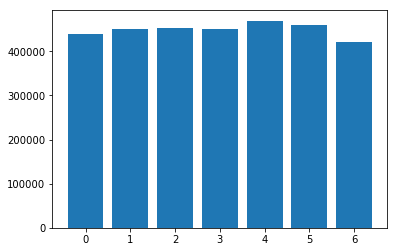

In [38]:
sum_1=usage.groupby(['leas_weekday'])['memb_no'].count()
plt.bar(sum_1.index.values, sum_1.values)
# 4: 금요일이 가장 높음

In [64]:
def get_bar_count(col1, col2):
    sum_1=usage.groupby([col1])[col2].count()
    print(sum_1)
    plt.bar(sum_1.index.values, sum_1.values)
    plt.title('{}_{}'.format(col1, col2))
    plt.show()
    
def get_bar_sum(col1, col2):
    sum_1=usage.groupby([col1])[col2].sum()
    print(sum_1)
    plt.bar(sum_1.index.values, sum_1.values)
    plt.title('{}_{}'.format(col1, col2))
    plt.show()
    
def get_bar_mean(col1, col2):
    sum_1=usage.groupby([col1])[col2].mean()
    print(sum_1)
    plt.bar(sum_1.index.values, sum_1.values)
    plt.title('{}_{}'.format(col1, col2))
    plt.show()

leas_weekday
0    440392
1    450238
2    452128
3    450829
4    469378
5    458982
6    420741
Name: memb_no, dtype: int64


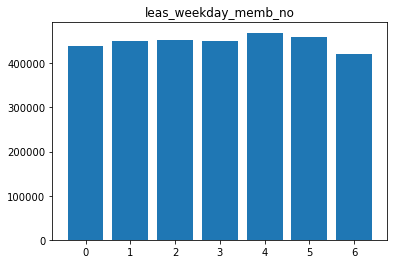

In [60]:
get_bar_count('leas_weekday', 'memb_no')

leas_month
1     101967
2      96155
3     187734
4     283239
5     366165
6     385224
7     324360
8     323420
9     372814
10    354392
11    224443
12    122775
Name: memb_no, dtype: int64


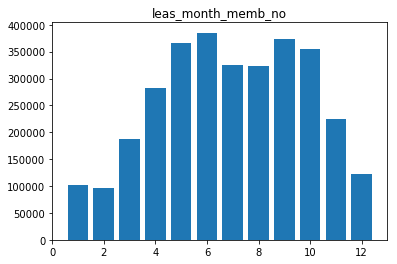

In [61]:
get_bar_count('leas_month', 'memb_no')

leas_day
1     104337
2     101584
3     104727
4     107365
5      99049
6      94315
7      99541
8     105383
9     101282
10     90906
11    102833
12    101841
13    107813
14    101431
15     97774
16    106480
17    106321
18    106085
19    108515
20    104913
21    108387
22    105625
23    101135
24    101238
25    105943
26    101351
27    105779
28    100072
29    101731
30    100424
31     58508
Name: memb_no, dtype: int64


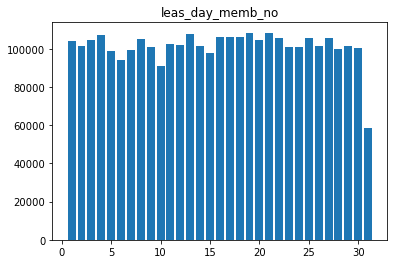

In [62]:
get_bar_count('leas_day', 'memb_no')

leas_weekday
0    1493.746646
1    1472.906418
2    1544.476460
3    1442.840210
4    1498.008083
5    1759.554120
6    1840.094524
Name: timegap_sec, dtype: float64


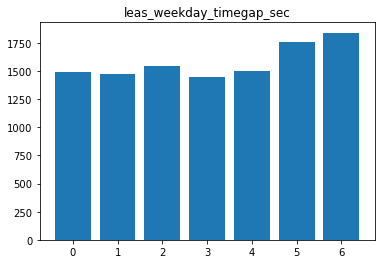

In [65]:
get_bar_mean('leas_weekday', 'timegap_sec')
# 이용자는 금요일에 가장 많지만, 평균 사용 시간은 주말이 우세하다

leas_month
1     1443.454922
2     1567.787791
3     1593.816400
4     1750.860747
5     1685.882479
6     1593.690829
7     1563.024445
8     1512.635721
9     1597.741367
10    1552.184398
11    1393.890556
12    1430.391244
Name: timegap_sec, dtype: float64


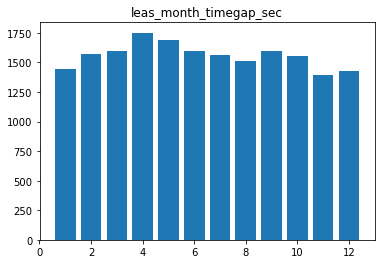

In [66]:
get_bar_mean('leas_month', 'timegap_sec')
# 이용자는 금요일에 가장 많지만, 평균 사용 시간은 주말이 우세하다

leas_day
1     1606.075620
2     1601.924289
3     1653.841244
4     1580.422577
5     1612.777868
6     1570.666797
7     1619.162737
8     1551.640805
9     1625.572303
10    1550.512914
11    1525.534819
12    1514.994884
13    1571.747776
14    1531.804882
15    1571.650684
16    1579.666088
17    1556.585726
18    1825.195636
19    1546.826190
20    1554.936938
21    1584.155351
22    1536.308554
23    1592.265823
24    1570.213724
25    1554.242876
26    1576.234768
27    1524.442470
28    1518.559827
29    1565.855020
30    1547.071596
31    1523.196794
Name: timegap_sec, dtype: float64


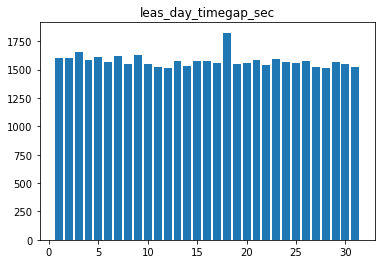

In [67]:
get_bar_mean('leas_day', 'timegap_sec')
# 이용자는 금요일에 가장 많지만, 평균 사용 시간은 주말이 우세하다